In [19]:
# load requred libraries
import pandas as pd
import numpy as np

In [3]:
# import csv 
df = pd.read_csv('Input/2019 Winter Data Science Intern Challenge Data Set.csv')
df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


In [4]:
# check data frame structure
df.tail()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
4995,4996,73,993,330,2,debit,2017-03-30 13:47:17
4996,4997,48,789,234,2,cash,2017-03-16 20:36:16
4997,4998,56,867,351,3,cash,2017-03-19 5:42:42
4998,4999,60,825,354,2,credit_card,2017-03-16 14:51:18
4999,5000,44,734,288,2,debit,2017-03-18 15:48:18


# 1. Exploratory Data Analysis
## 1.1 General Analysit

In [5]:
df.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   order_id        5000 non-null   int64 
 1   shop_id         5000 non-null   int64 
 2   user_id         5000 non-null   int64 
 3   order_amount    5000 non-null   int64 
 4   total_items     5000 non-null   int64 
 5   payment_method  5000 non-null   object
 6   created_at      5000 non-null   object
dtypes: int64(5), object(2)
memory usage: 273.6+ KB


In [9]:
# calculate the average price of each order
df['average_price'] = df.order_amount/df.total_items

In [10]:
df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,average_price
0,1,53,746,224,2,cash,2017-03-13 12:36:56,112.0
1,2,92,925,90,1,cash,2017-03-03 17:38:52,90.0
2,3,44,861,144,1,cash,2017-03-14 4:23:56,144.0
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37,156.0
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11,156.0


In [32]:
# calculate the mean of order amount
df.order_amount.mean()

3145.128

In [34]:
# calculate the median of order amount
df.order_amount.median()

284.0

## 1.2 Average Price Outlier Analysis

In [20]:
# check the unique value of average price
np.sort(df['average_price'].unique())

array([   90.,    94.,   101.,   111.,   112.,   114.,   116.,   117.,
         118.,   122.,   127.,   128.,   129.,   130.,   131.,   132.,
         133.,   134.,   136.,   138.,   140.,   142.,   144.,   145.,
         146.,   147.,   148.,   149.,   153.,   154.,   155.,   156.,
         158.,   160.,   161.,   162.,   163.,   164.,   165.,   166.,
         168.,   169.,   171.,   172.,   173.,   176.,   177.,   178.,
         181.,   184.,   187.,   190.,   193.,   195.,   196.,   201.,
         352., 25725.])

<AxesSubplot:>

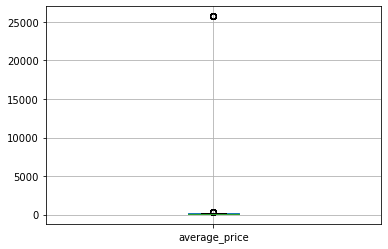

In [47]:
# 25725 is an outlier from average price
df.boxplot(column = 'average_price')

In [11]:
# filter the outlier on average price
df_average_price_outlier = df[df['average_price'] > 500]

In [12]:
# check the structure of data frame
df_average_price_outlier

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,average_price
160,161,78,990,25725,1,credit_card,2017-03-12 5:56:57,25725.0
490,491,78,936,51450,2,debit,2017-03-26 17:08:19,25725.0
493,494,78,983,51450,2,cash,2017-03-16 21:39:35,25725.0
511,512,78,967,51450,2,cash,2017-03-09 7:23:14,25725.0
617,618,78,760,51450,2,cash,2017-03-18 11:18:42,25725.0
691,692,78,878,154350,6,debit,2017-03-27 22:51:43,25725.0
1056,1057,78,800,25725,1,debit,2017-03-15 10:16:45,25725.0
1193,1194,78,944,25725,1,debit,2017-03-16 16:38:26,25725.0
1204,1205,78,970,25725,1,credit_card,2017-03-17 22:32:21,25725.0
1259,1260,78,775,77175,3,credit_card,2017-03-27 9:27:20,25725.0


## 1.3 total_items Outlier Analysis

In [13]:
# check the items number of each order
df.total_items.unique()

array([   2,    1,    3, 2000,    4,    5,    6,    8], dtype=int64)

<AxesSubplot:>

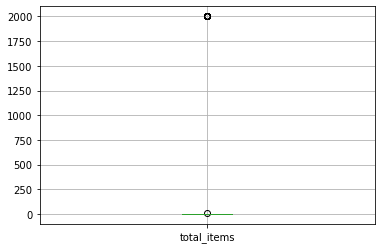

In [48]:
# total items 2000 is an outlier
df.boxplot(column = 'total_items')

In [14]:
# filter out the outlier on total items
df_total_items_outlier = df[df['total_items'] > 10]
df_total_items_outlier

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,average_price
15,16,42,607,704000,2000,credit_card,2017-03-07 4:00:00,352.0
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00,352.0
520,521,42,607,704000,2000,credit_card,2017-03-02 4:00:00,352.0
1104,1105,42,607,704000,2000,credit_card,2017-03-24 4:00:00,352.0
1362,1363,42,607,704000,2000,credit_card,2017-03-15 4:00:00,352.0
1436,1437,42,607,704000,2000,credit_card,2017-03-11 4:00:00,352.0
1562,1563,42,607,704000,2000,credit_card,2017-03-19 4:00:00,352.0
1602,1603,42,607,704000,2000,credit_card,2017-03-17 4:00:00,352.0
2153,2154,42,607,704000,2000,credit_card,2017-03-12 4:00:00,352.0
2297,2298,42,607,704000,2000,credit_card,2017-03-07 4:00:00,352.0


## 1.4 Dataset after removing outliers

In [25]:
# remove the outlier
df_cleaned = df.loc[df['total_items'] < 10,].loc[df['average_price'] < 500, ]

In [27]:
# check data frame info
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4937 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   order_id        4937 non-null   int64  
 1   shop_id         4937 non-null   int64  
 2   user_id         4937 non-null   int64  
 3   order_amount    4937 non-null   int64  
 4   total_items     4937 non-null   int64  
 5   payment_method  4937 non-null   object 
 6   created_at      4937 non-null   object 
 7   average_price   4937 non-null   float64
dtypes: float64(1), int64(5), object(2)
memory usage: 347.1+ KB


In [29]:
df_cleaned.describe()

,order_id,shop_id,user_id,order_amount,total_items,average_price
count,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000
mean,2499.551347,49.846465,849.752279,302.580514,1.994734,151.788536
std,1444.069407,29.061131,86.840313,160.804912,0.982821,29.034215
min,1.000000,1.000000,700.000000,90.000000,1.000000,90.000000
25%,1248.000000,24.000000,775.000000,163.000000,1.000000,132.000000
50%,2497.000000,50.000000,850.000000,284.000000,2.000000,153.000000
75%,3751.000000,74.000000,925.000000,387.000000,3.000000,166.000000
max,5000.000000,100.000000,999.000000,1760.000000,8.000000,352.000000


In [30]:
# calculate the mean after removing outliers
df_cleaned.order_amount.mean()

302.58051448247926

In [31]:
# calculate the median after removing outliers
df_cleaned.order_amount.median()

284.0

## After removing outliers, the median of order_amount is very close to the mean of order amount.

# 2. Explore if there is any difference for different payment methods

In [37]:
# check payment methods
df_cleaned.payment_method.unique()

array(['cash', 'credit_card', 'debit'], dtype=object)

In [46]:
# The order amounts for three different payment methods are basically the same
df_cleaned.groupby('payment_method').count()

,order_id,shop_id,user_id,order_amount,total_items,created_at,average_price
payment_method,,,,,,,
cash,1576,1576,1576,1576,1576,1576,1576
credit_card,1708,1708,1708,1708,1708,1708,1708
debit,1653,1653,1653,1653,1653,1653,1653


In [38]:
# filter data with different payment methods
df_cleaned_cash = df_cleaned[df_cleaned.payment_method == 'cash']
df_cleaned_debit = df_cleaned[df_cleaned.payment_method == 'debit']
df_cleaned_credit = df_cleaned[df_cleaned.payment_method == 'credit_card']

## 2.1 data frame info check

In [39]:
df_cleaned_cash.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1576 entries, 0 to 4997
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   order_id        1576 non-null   int64  
 1   shop_id         1576 non-null   int64  
 2   user_id         1576 non-null   int64  
 3   order_amount    1576 non-null   int64  
 4   total_items     1576 non-null   int64  
 5   payment_method  1576 non-null   object 
 6   created_at      1576 non-null   object 
 7   average_price   1576 non-null   float64
dtypes: float64(1), int64(5), object(2)
memory usage: 110.8+ KB


In [40]:
df_cleaned_debit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1653 entries, 8 to 4999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   order_id        1653 non-null   int64  
 1   shop_id         1653 non-null   int64  
 2   user_id         1653 non-null   int64  
 3   order_amount    1653 non-null   int64  
 4   total_items     1653 non-null   int64  
 5   payment_method  1653 non-null   object 
 6   created_at      1653 non-null   object 
 7   average_price   1653 non-null   float64
dtypes: float64(1), int64(5), object(2)
memory usage: 116.2+ KB


In [41]:
df_cleaned_credit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1708 entries, 3 to 4998
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   order_id        1708 non-null   int64  
 1   shop_id         1708 non-null   int64  
 2   user_id         1708 non-null   int64  
 3   order_amount    1708 non-null   int64  
 4   total_items     1708 non-null   int64  
 5   payment_method  1708 non-null   object 
 6   created_at      1708 non-null   object 
 7   average_price   1708 non-null   float64
dtypes: float64(1), int64(5), object(2)
memory usage: 120.1+ KB


## 2.2 data frame value check

In [43]:
df_cleaned_cash.describe()

,order_id,shop_id,user_id,order_amount,total_items,average_price
count,1576.000000,1576.000000,1576.000000,1576.000000,1576.000000,1576.000000
mean,2519.574239,50.541244,850.016497,297.974619,1.968909,151.074873
std,1416.172165,29.089782,85.843584,160.289720,0.961968,28.269937
min,1.000000,1.000000,700.000000,90.000000,1.000000,90.000000
25%,1334.500000,25.000000,777.000000,161.000000,1.000000,132.000000
50%,2527.500000,51.000000,853.000000,280.000000,2.000000,153.000000
75%,3719.250000,75.000000,922.000000,386.000000,3.000000,165.000000
max,4998.000000,100.000000,999.000000,1760.000000,6.000000,352.000000


In [44]:
df_cleaned_debit.describe()

,order_id,shop_id,user_id,order_amount,total_items,average_price
count,1653.000000,1653.000000,1653.000000,1653.000000,1653.000000,1653.000000
mean,2475.166969,49.114338,850.114338,308.176044,2.025408,152.526921
std,1443.040267,29.013391,86.394989,162.934006,0.991774,30.956484
min,9.000000,1.000000,700.000000,90.000000,1.000000,90.000000
25%,1198.000000,23.000000,776.000000,165.000000,1.000000,131.000000
50%,2439.000000,50.000000,849.000000,288.000000,2.000000,153.000000
75%,3723.000000,73.000000,924.000000,390.000000,3.000000,169.000000
max,5000.000000,100.000000,999.000000,1408.000000,8.000000,352.000000


In [45]:
df_cleaned_credit.describe()

,order_id,shop_id,user_id,order_amount,total_items,average_price
count,1708.000000,1708.000000,1708.000000,1708.000000,1708.000000,1708.000000
mean,2504.675059,49.913934,849.158080,301.415105,1.988876,151.732436
std,1470.818005,29.081188,88.221314,159.131464,0.992883,27.780910
min,4.000000,1.000000,700.000000,90.000000,1.000000,90.000000
25%,1202.500000,24.000000,774.000000,162.000000,1.000000,133.000000
50%,2527.000000,49.000000,847.000000,284.000000,2.000000,153.000000
75%,3802.000000,75.000000,928.000000,386.250000,3.000000,166.500000
max,4999.000000,100.000000,999.000000,1056.000000,6.000000,352.000000


## There is much difference on order amount for three payment methods, except the outlier (shop id: 42) with the payment method of credit card

## Same methodologies can be used to check which shop is most ordered and earns the most revenue as well as which user places the most order and spends the most money